In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
plt.style.use('seaborn')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/../input/house-prices-dataset'):
    for filename in filenames:
            print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/../input/house-prices-dataset/sample_submission.csv
/kaggle/input/../input/house-prices-dataset/data_description.txt
/kaggle/input/../input/house-prices-dataset/train.csv
/kaggle/input/../input/house-prices-dataset/test.csv


In [2]:
import warnings
import matplotlib.cbook
import warnings; warnings.simplefilter('ignore')
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

## Setting the evaluation functions

In [3]:
# Defining the Root mean -squared Error metric
def metrics(actuals,predictions):
    
    error=np.sqrt(mean_squared_error(np.log(actuals), np.log(predictions)))
    return error

from sklearn.metrics import make_scorer
rmse = make_scorer(metrics, greater_is_better=False)

In [4]:
# Reading the Training data
x_train=pd.read_csv('../input/house-prices-dataset/train.csv')
x_train.drop(columns=['Id'],axis=1,inplace=True)
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Splitting the training data into train,validation 

In [5]:
# Since I  dont have any dataset to test our model on unseen dataset. I will
# split the training data into train and validation data,so that i can check the performance
# of the model on an unseen dataset.
x_train,x_val,y_train,y_val=train_test_split(x_train,x_train['SalePrice'],
                                             test_size=0.3,random_state=34)

In [6]:
# removing the target variable from the validation dataset
x_val.drop(columns=['SalePrice'],axis=1,inplace=True)
x_val.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1399,50,RL,51.0,6171,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal
578,160,FV,34.0,3604,Pave,Pave,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
318,60,RL,90.0,9900,Pave,NaN,Reg,Low,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
1340,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,6,2007,WD,Normal
654,20,RL,91.0,10437,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal


In [7]:
# Reading the test dataset
x_test=pd.read_csv('../input/house-prices-dataset/test.csv')
x_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# This are the respective dimensions of my datasets
x_train.shape,x_val.shape,x_test.shape

((1022, 80), (438, 79), (1459, 80))

In [9]:
#Numeric_col means columns with numeric values
#Cat_col means columns with categorical values
numeric_col=[var for var in x_train.columns if x_train[var].dtypes!='O'and var!='SalePrice']
cat_col=[var for var in x_train.columns if x_train[var].dtypes=='O']

In [10]:
# Number of unique values for each numeric variable.
x_train[numeric_col].nunique()

MSSubClass        15
LotFrontage      104
LotArea          791
OverallQual       10
OverallCond        8
YearBuilt        107
YearRemodAdd      61
MasVnrArea       267
BsmtFinSF1       494
BsmtFinSF2       107
BsmtUnfSF        619
TotalBsmtSF      580
1stFlrSF         621
2ndFlrSF         320
LowQualFinSF      18
GrLivArea        684
BsmtFullBath       4
BsmtHalfBath       3
FullBath           4
HalfBath           3
BedroomAbvGr       8
KitchenAbvGr       3
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       95
GarageCars         5
GarageArea       368
WoodDeckSF       215
OpenPorchSF      167
EnclosedPorch     95
3SsnPorch         16
ScreenPorch       63
PoolArea           7
MiscVal           17
MoSold            12
YrSold             5
dtype: int64

In [11]:
# Lets us find out the discrete variables.For this i have set the condition that any 
# numeric variable whose number of unique observation is less than 10 is classified as unique
discrete_cols=[var for var in numeric_col if x_train[var].nunique()<10]
discrete_cols

['OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'YrSold']

In [12]:
# Similarly for continous variable
continous_cols=[var for var in numeric_col if var not in discrete_cols]
continous_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold']

In [13]:
# missing_num means numeric columns with missing value
# missing_cat means categorical columns with missing value
missing_num=[ var for var in numeric_col if x_train[var].isnull().mean()>0]
missing_cat=[ var for var in cat_col if x_train[var].isnull().mean()>0]

In [14]:
missing_num

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [15]:
missing_cat

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Missing Value Imputation

###  Replace missing value with median imputation.

1. Data is missing completely at random</br>
2. No more than 5% of the variable contains missing data

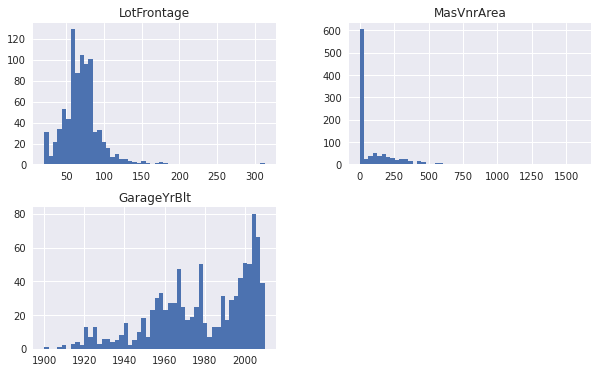

In [16]:
# Distribution of numeric columns having missing values
x_train[missing_num].hist(figsize=(10,6),bins=50);

In [17]:
# % of missing values in numeric columns
x_train[missing_num].isnull().mean()

LotFrontage    0.167319
MasVnrArea     0.003914
GarageYrBlt    0.055773
dtype: float64

In [18]:
def median_impute(var):
  median=x_train[var].median()
  x_train[var]=x_train[var].fillna(median)
  x_val[var]=x_val[var].fillna(median)
  x_test[var]=x_test[var].fillna(median)
  return x_train,x_val,x_test

In [19]:
# Assuming all the MasVnrArea is missing completely at random
# imputing 'LotFrontage ' with median value
x_train,x_val,x_test=median_impute('MasVnrArea')
x_train['MasVnrArea'].isnull().mean()

0.0

### Replace missing value with end tail imputation-
The rationale is that if the value is missing, it is for a reason, therefore, NA 
would not be replaced by the mean which makes them look like the majority 
of the observations. Instead, NA are flagged as different by assigning a value 
at the tail of the distribution, where observations are rarely represented in 
the population.

In [20]:
def end_sample(var,distance):
  iqr=x_train[var].quantile(0.75)-x_train[var].quantile(0.25)
  upper_bound=x_train[var].quantile(0.75)+distance*iqr

  return upper_bound

In [21]:
for var in ['GarageYrBlt','LotFrontage']:
    upper_value=end_sample(var,3)
    x_train[var]=x_train[var].fillna(upper_value)
    x_val[var]=x_val[var].fillna(upper_value)
    x_test[var]=x_test[var].fillna(upper_value)

In [22]:
x_train[missing_num].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

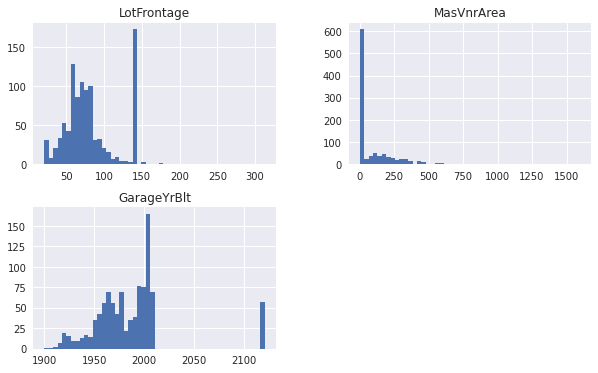

In [23]:
# After imputation the distribution of the variables are as follows
x_train[missing_num].hist(figsize=(10,6),bins=50);

## Add a Category for Missing Data</br>
This next method is quite straightforward and only works for categorical data. You </br>would create a separate label for missing values — ‘missing’ or it could be anything relevant. The idea is to flag missing values and understand the importance of being missing.</br>
Assumptions: No assumption</br>
Advantages: Quick and easy to implement; Helps understand importance of missing data</br>
Disadvantage: Potentially misunderstood data; Number of missing data should be large enough

In [24]:
x_train[missing_cat].isnull().mean()

Alley           0.943249
MasVnrType      0.003914
BsmtQual        0.022505
BsmtCond        0.022505
BsmtExposure    0.023483
BsmtFinType1    0.022505
BsmtFinType2    0.022505
FireplaceQu     0.469667
GarageType      0.055773
GarageFinish    0.055773
GarageQual      0.055773
GarageCond      0.055773
PoolQC          0.994129
Fence           0.816047
MiscFeature     0.966732
dtype: float64

In [25]:
# Now for Categorical Variable
for var in ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']:
    x_train[var]=x_train[var].fillna('Missing')
    x_val[var]=x_val[var].fillna('Missing')
    x_test[var]=x_test[var].fillna('Missing')

In [26]:
columns_remaining=['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                   'BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageQual']


In [27]:
for var in columns_remaining:
    mode=x_train[var].mode()
    x_train[var]=x_train[var].fillna(mode)
    x_val[var]=x_val[var].fillna(mode)
    x_test[var]=x_test[var].fillna(mode)

In [28]:
x_train[columns_remaining].isnull().mean()

MasVnrType      0.003914
BsmtQual        0.022505
BsmtCond        0.022505
BsmtExposure    0.023483
BsmtFinType1    0.022505
BsmtFinType2    0.022505
GarageType      0.055773
GarageFinish    0.055773
GarageQual      0.055773
GarageQual      0.055773
dtype: float64

## Create group of discrete variables

<AxesSubplot:>

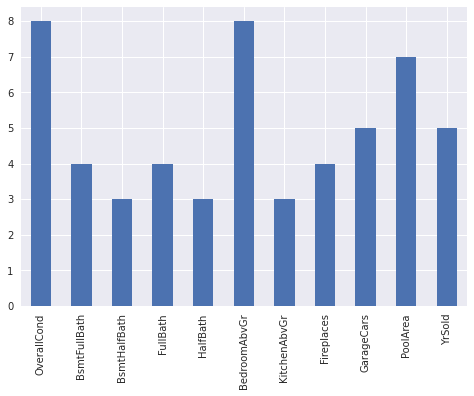

In [29]:
x_train[discrete_cols].nunique().plot.bar()

In [30]:
x_train[discrete_cols].apply(lambda x:x.unique())

OverallCond              [5, 6, 7, 9, 8, 4, 3, 2]
BsmtFullBath                         [1, 0, 2, 3]
BsmtHalfBath                            [0, 1, 2]
FullBath                             [1, 2, 3, 0]
HalfBath                                [0, 1, 2]
BedroomAbvGr             [3, 2, 1, 4, 5, 0, 6, 8]
KitchenAbvGr                            [1, 2, 0]
Fireplaces                           [0, 1, 2, 3]
GarageCars                        [2, 0, 3, 1, 4]
PoolArea        [0, 519, 512, 555, 648, 576, 738]
YrSold             [2006, 2008, 2007, 2010, 2009]
dtype: object

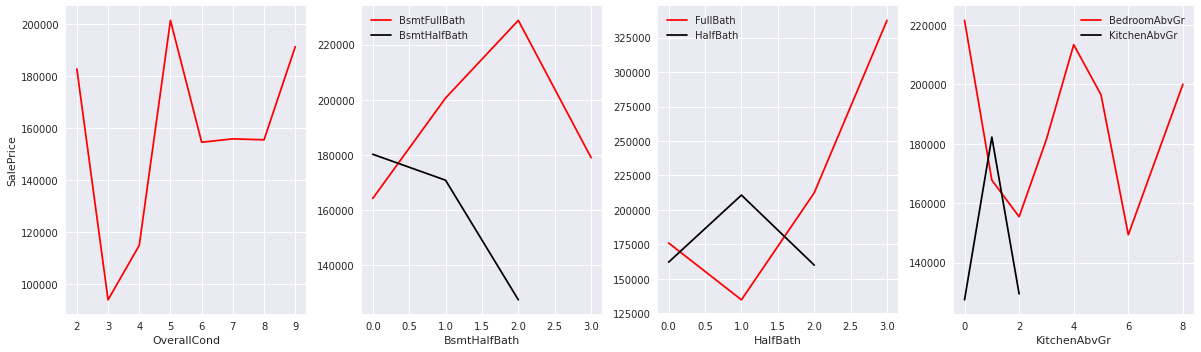

In [31]:
plt.figure(figsize=(25,5))
plt.subplot(1,6,1)
x_train.groupby('OverallCond')['SalePrice'].mean().plot(color='r')
plt.ylabel('SalePrice')
plt.subplot(1,6,2)
x_train.groupby('BsmtFullBath')['SalePrice'].mean().plot(label='BsmtFullBath',color='r')
x_train.groupby('BsmtHalfBath')['SalePrice'].mean().plot(label='BsmtHalfBath',color='k')
plt.legend(loc='upper left')
plt.subplot(1,6,3)
x_train.groupby('FullBath')['SalePrice'].mean().plot(label='FullBath',color='r')
x_train.groupby('HalfBath')['SalePrice'].mean().plot(label='HalfBath',color='k')
plt.legend()
plt.subplot(1,6,4)
x_train.groupby('BedroomAbvGr')['SalePrice'].mean().plot(label='BedroomAbvGr',color='r')
x_train.groupby('KitchenAbvGr')['SalePrice'].mean().plot(label='KitchenAbvGr',color='k')
plt.legend(loc='upper right')
plt.tight_layout()

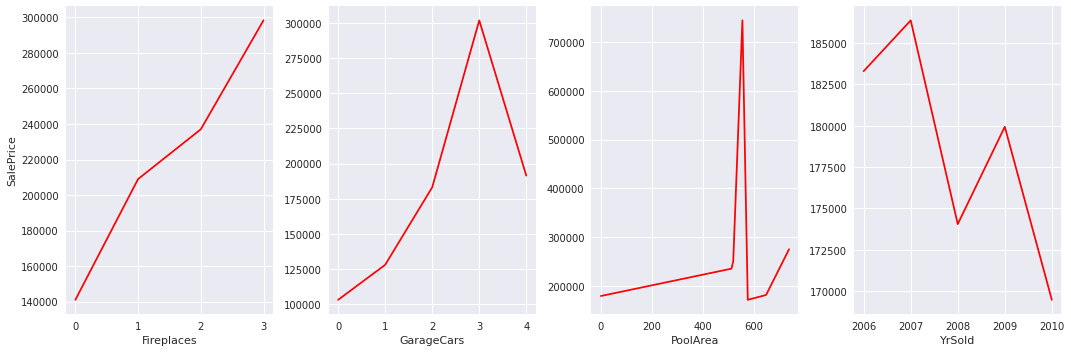

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
x_train.groupby('Fireplaces')['SalePrice'].mean().plot(color='r')
plt.ylabel('SalePrice')
plt.subplot(1,4,2)
x_train.groupby('GarageCars')['SalePrice'].mean().plot(color='r')
plt.subplot(1,4,3)
x_train.groupby('PoolArea')['SalePrice'].mean().plot(color='r')
plt.subplot(1,4,4)
x_train.groupby('YrSold')['SalePrice'].mean().plot(color='r')
plt.tight_layout()

We can see that most of the variable shows no montonic relationship with the target variable. In order to achieve monotonicity we will first discretize the variables into custom groups and then encode them w.r.t the target variable i.e SalePrice

In [33]:
# Discretizing the discrete variable according to custom categories


OverallCond=['Poor','Average','Good']
OverallCond_int=[2,4,6,8]
BsmtFullBath=['0-1','1-2','2-3']
BsmtFullBath_int=[0,1,2,3]
FullBath=['0-1','1-2','2-3']
FullBath_int=[0,1,2,3]
BsmtHalfBath=['0-1','1-2']
BsmtHalfBath_int=[0,1,2]
HalfBath=['0-1','1-2']
HalfBath_int=[0,1,2]
BedroomAbvGr=['0-2','2-4','4-6','6-8']
BedroomAbvGr_int=[0,2,4,6,8]
KitchenAbvGr=['0-1','1-2']
KitchenAbvGr_int=[0,1,2]
Fireplaces=['0-1','1-2','2-3']
Fireplaces_int=[0, 1, 2, 3]
GarageCars=['0-2','2-4']
GarageCars_int=[0,2,4]
PoolArea=['Below 500','Between 500-600','Above 600']
PoolArea_int=[0, 500, 600,800]
YrSold=['2006-2008','2008-2010']
YrSold_int=[2006, 2008, 2010]


In [34]:

def discrete(col,train,val,test,interval,label):
    train[col]=pd.cut(train[col],bins=interval,labels=label,include_lowest=True)
    val[col]=pd.cut(val[col],bins=interval,labels=label,include_lowest=True)
    test[col]=pd.cut(test[col],bins=interval,labels=label,include_lowest=True)
    return train,val,test

In [35]:
discrete('OverallCond',x_train,x_val,x_test,OverallCond_int,OverallCond);
discrete('BsmtFullBath',x_train,x_val,x_test,BsmtFullBath_int,BsmtFullBath);
discrete('BsmtHalfBath',x_train,x_val,x_test,BsmtHalfBath_int,BsmtHalfBath);
discrete('FullBath',x_train,x_val,x_test,FullBath_int,FullBath);
discrete('HalfBath',x_train,x_val,x_test,HalfBath_int,HalfBath);
discrete('BedroomAbvGr',x_train,x_val,x_test,BedroomAbvGr_int,BedroomAbvGr);
discrete('KitchenAbvGr',x_train,x_val,x_test,KitchenAbvGr_int,KitchenAbvGr);
discrete('Fireplaces',x_train,x_val,x_test,Fireplaces_int,Fireplaces);
discrete('GarageCars',x_train,x_val,x_test,GarageCars_int,GarageCars);
discrete('PoolArea',x_train,x_val,x_test,PoolArea_int,PoolArea);
discrete('YrSold',x_train,x_val,x_test,YrSold_int,YrSold);

In [36]:
cat_col.extend(discrete_cols)

In [37]:
x_train[discrete_cols].head()

,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PoolArea,YrSold
512,Average,0-1,0-1,0-1,0-1,2-4,0-1,0-1,0-2,Below 500,2006-2008
343,Average,0-1,0-1,1-2,0-1,0-2,0-1,0-1,0-2,Below 500,2006-2008
290,Average,0-1,0-1,1-2,0-1,2-4,0-1,0-1,0-2,Below 500,2006-2008
163,Average,0-1,0-1,0-1,0-1,0-2,0-1,0-1,0-2,Below 500,2006-2008
234,Average,0-1,0-1,1-2,0-1,2-4,0-1,1-2,0-2,Below 500,2008-2010


In [38]:
x_val[discrete_cols].head()

,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PoolArea,YrSold
1399,Average,0-1,0-1,1-2,0-1,2-4,0-1,0-1,0-2,Below 500,2008-2010
578,Average,0-1,0-1,1-2,0-1,0-2,0-1,0-1,0-2,Below 500,2006-2008
318,Average,0-1,0-1,1-2,0-1,2-4,0-1,0-1,2-4,Below 500,2008-2010
1340,Average,0-1,0-1,0-1,0-1,2-4,0-1,0-1,2-4,Below 500,2006-2008
654,Average,0-1,0-1,1-2,0-1,0-2,0-1,0-1,2-4,Below 500,2006-2008


## Rare label Encoding

In [39]:
# Identifying variables with a large number of different categories
# i.e variables that have high cardinality.
for col in cat_col:
    labels=len(x_train[col].value_counts())
    print('{} has {} different category'.format(col,labels))

MSZoning has 5 different category
Street has 2 different category
Alley has 3 different category
LotShape has 4 different category
LandContour has 4 different category
Utilities has 2 different category
LotConfig has 5 different category
LandSlope has 3 different category
Neighborhood has 25 different category
Condition1 has 9 different category
Condition2 has 5 different category
BldgType has 5 different category
HouseStyle has 8 different category
RoofStyle has 6 different category
RoofMatl has 6 different category
Exterior1st has 15 different category
Exterior2nd has 16 different category
MasVnrType has 4 different category
ExterQual has 4 different category
ExterCond has 4 different category
Foundation has 6 different category
BsmtQual has 4 different category
BsmtCond has 4 different category
BsmtExposure has 4 different category
BsmtFinType1 has 6 different category
BsmtFinType2 has 6 different category
Heating has 5 different category
HeatingQC has 4 different category
CentralAi

High cardinality may pose the following problems:

Variables with too many labels tend to dominate over those with only a few labels, particularly in Tree based algorithms.

A big number of labels within a variable may introduce noise with little, if any, information, therefore making machine learning models prone to over-fit.

Some of the labels may only be present in the training data set, but not in the test set, therefore machine learning algorithms may over-fit to the training set.

Contrarily, some labels may appear only in the test set, therefore leaving the machine learning algorithms unable to perform a calculation over the new (unseen) observation.

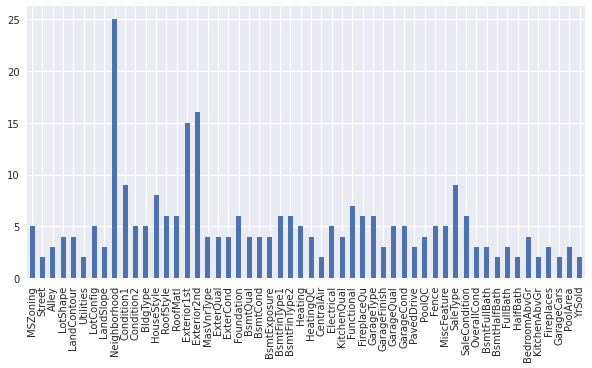

In [40]:
plt.figure(figsize=(10,5))
x_train[cat_col].nunique().plot.bar();

In [41]:
# Percentage of observations in each category in the respective categorical columns
for col in cat_col:
    
    print(x_train.groupby(col)[col].count() / len(x_train)) # frequency
    print()

MSZoning
C (all)    0.008806
FV         0.040117
RH         0.011742
RL         0.791585
RM         0.147750
Name: MSZoning, dtype: float64

Street
Grvl    0.004892
Pave    0.995108
Name: Street, dtype: float64

Alley
Grvl       0.034247
Missing    0.943249
Pave       0.022505
Name: Alley, dtype: float64

LotShape
IR1    0.322896
IR2    0.026419
IR3    0.006849
Reg    0.643836
Name: LotShape, dtype: float64

LandContour
Bnk    0.047945
HLS    0.037182
Low    0.020548
Lvl    0.894325
Name: LandContour, dtype: float64

Utilities
AllPub    0.999022
NoSeWa    0.000978
Name: Utilities, dtype: float64

LotConfig
Corner     0.177104
CulDSac    0.053816
FR2        0.039139
FR3        0.003914
Inside     0.726027
Name: LotConfig, dtype: float64

LandSlope
Gtl    0.946184
Mod    0.045988
Sev    0.007828
Name: LandSlope, dtype: float64

Neighborhood
Blmngtn    0.008806
Blueste    0.000978
BrDale     0.011742
BrkSide    0.039139
ClearCr    0.019569
CollgCr    0.108611
Crawfor    0.037182
Edwards  

we can see some categories occur more frequently than others. we will set a certain threshold regarding percentage of appearance of a category below which we will identify the category as a rare label

In [42]:
def non_rare_labels(data, var, tolerance):
    
    temp = data.groupby([var])[var].count() / len(data)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [43]:
def rare_encoding(x_train,x_val,x_test,var,tolerance):
    x_train = x_train.copy()
    x_val=x_val.copy()
    x_test = x_test.copy()
    
    freq_category=non_rare_labels(x_train,var,tolerance)
    x_train[var]=np.where(x_train[var].isin(freq_category),x_train[var],'Rare')
    x_val[var]=np.where(x_val[var].isin(freq_category),x_val[var],'Rare')
    x_test[var]=np.where(x_test[var].isin(freq_category),x_test[var],'Rare')
    
    return x_train,x_val,x_test

In [44]:
# setting the threshold to 0.05 below which the obeservation in the category 
# will be renamed as rare label.i.e they occcur rarely
for col in cat_col:
    x_train,x_val,x_test=rare_encoding(x_train,x_val,x_test,col,tolerance=0.05)

## Target Encoding the categorical variables

In [45]:
# Encoding the categories with target variable i.e  mean SalePrice
# i.e Ordering the categories according to the target means assigning a number 
# to the category from 1 to k, where k is the number of distinct categories in the variable, 
# but this numbering is informed by the mean of the target for each category.

def maps(df,var,target):
  categories=df.groupby([var])[target].mean().sort_values(ascending=False).index

  mappings={k:i for i, k in enumerate(categories,0)}

  return mappings

def target_encode(train,val,test,var,mappings):
    x_train[var]=x_train[var].map(mappings)
    x_val[var]=x_val[var].map(mappings)
    x_test[var]=x_test[var].map(mappings)

In [46]:
for var in cat_col:
    mappings=maps(x_train,var,'SalePrice')
    target_encode(x_train,x_val,x_test,var,mappings)

In [47]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
512,20,0,70.0,9100,0,0,2,0,0,1,...,1,1,0,0,0,7,0,1,1,129900
343,120,0,63.0,8849,0,0,1,0,0,3,...,1,1,0,0,0,7,0,1,1,266000
290,60,0,120.0,15611,0,0,2,0,0,3,...,1,1,0,0,0,7,0,0,0,233230
163,45,0,55.0,5500,0,0,2,0,0,3,...,1,1,2,0,0,4,0,1,1,103200
234,60,0,141.5,7851,0,0,2,0,0,3,...,1,1,0,0,0,5,1,1,1,216500


In [48]:
x_val.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1399,50,0,51.0,6171,0,0,2,0,0,3,...,0,1,1,2,0,0,10,1,1,1
578,160,1,34.0,3604,0,1,2,0,0,1,...,0,1,1,0,0,0,2,0,1,3
318,60,0,90.0,9900,0,0,2,1,0,3,...,0,1,1,0,0,0,4,1,1,1
1340,20,0,70.0,8294,0,0,2,0,0,3,...,0,1,1,1,0,0,6,0,1,1
654,20,0,91.0,10437,0,0,1,0,0,3,...,0,1,1,0,0,0,8,0,1,1


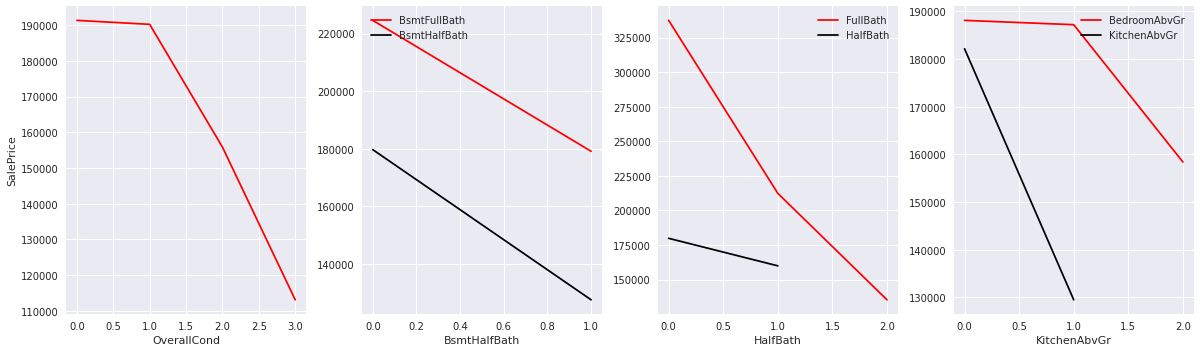

In [49]:
plt.figure(figsize=(25,5))
plt.subplot(1,6,1)
x_train.groupby('OverallCond')['SalePrice'].mean().plot(color='r')
plt.ylabel('SalePrice')
plt.subplot(1,6,2)
x_train.groupby('BsmtFullBath')['SalePrice'].mean().plot(label='BsmtFullBath',color='r')
x_train.groupby('BsmtHalfBath')['SalePrice'].mean().plot(label='BsmtHalfBath',color='k')
plt.legend(loc='upper left')
plt.subplot(1,6,3)
x_train.groupby('FullBath')['SalePrice'].mean().plot(label='FullBath',color='r')
x_train.groupby('HalfBath')['SalePrice'].mean().plot(label='HalfBath',color='k')
plt.legend()
plt.subplot(1,6,4)
x_train.groupby('BedroomAbvGr')['SalePrice'].mean().plot(label='BedroomAbvGr',color='r')
x_train.groupby('KitchenAbvGr')['SalePrice'].mean().plot(label='KitchenAbvGr',color='k')
plt.legend(loc='upper right')
plt.tight_layout()

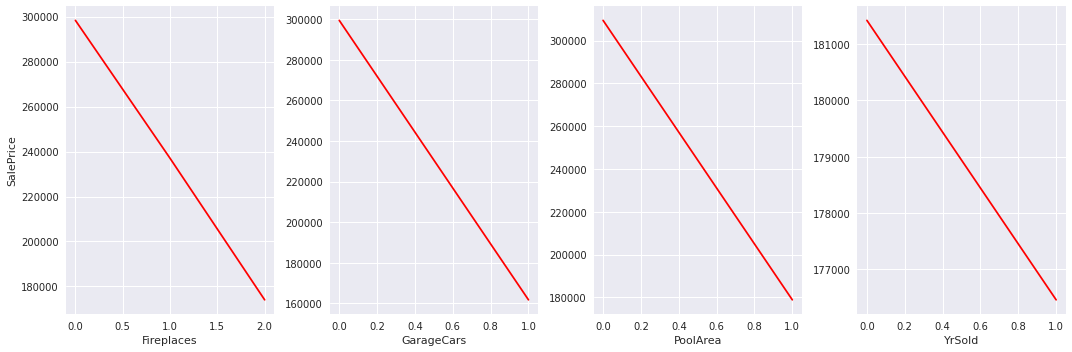

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
x_train.groupby('Fireplaces')['SalePrice'].mean().plot(color='r')
plt.ylabel('SalePrice')
plt.subplot(1,4,2)
x_train.groupby('GarageCars')['SalePrice'].mean().plot(color='r')
plt.subplot(1,4,3)
x_train.groupby('PoolArea')['SalePrice'].mean().plot(color='r')
plt.subplot(1,4,4)
x_train.groupby('YrSold')['SalePrice'].mean().plot(color='r')
plt.tight_layout()

We can see that most of the variable shows somewhat montonic relationship with the target variable compare to before ,which we visualised previously .

In [51]:
# Droping the target column i.e SalePrice
x_train.drop(columns=['SalePrice'],axis=1,inplace=True)

In [52]:
# Still some missing values present in the test data
missing_values=[var for var in x_test.columns if x_test[var].isnull().mean()>0]
missing_values

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea']

In [53]:
# Droping the columns containing missing data  also in train and validation data to 
# prevent overfitting
x_train.drop(columns=missing_values,axis=1,inplace=True)
x_val.drop(columns=missing_values,axis=1,inplace=True)
x_test.drop(columns=missing_values,axis=1,inplace=True)

In [54]:
# Storing the id of the test columns and using the remaining columns for prediction
Id=x_test['Id']
x_test=x_test.iloc[:,1:]

In [55]:
x_train.shape,x_val.shape,x_test.shape

((1022, 73), (438, 73), (1459, 73))

## Training the model

In [56]:
# setting the grid -search parameters 

nestimators=[100,500,2500]

params_grid={'n_estimators':nestimators}

regressor=RandomForestRegressor(n_estimators=nestimators,max_depth=None,random_state=34,max_features=None,oob_score=True)

gridsearch=GridSearchCV(estimator=regressor,param_grid=params_grid,scoring=rmse,n_jobs=-1,cv=5)

gridsearch.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=None,
                                             n_estimators=[100, 500, 2500],
                                             oob_score=True, random_state=34),
             n_jobs=-1, param_grid={'n_estimators': [100, 500, 2500]},
             scoring=make_scorer(metrics, greater_is_better=False))

In [57]:
gridsearch.best_params_

{'n_estimators': 2500}

## Prediction on training and validation data and testing the results

In [58]:
metrics(y_train,gridsearch.predict(x_train))

0.05899048031773875

In [59]:
predictions=gridsearch.predict(x_val)
metrics(y_val,predictions)

0.1612831735565945

In [60]:
test_predictions=gridsearch.predict(x_test)

## Submission

In [61]:
sub = pd.DataFrame()
sub['Id'] = Id
sub['SalePrice'] = test_predictions
sub.to_csv('submission.csv',index=False)